# Class 22: More Regression, More Evaluation and LASSO

1. log prismia chat
1. say hello in the zoom chat

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

## Questions after class Monday

Some good questions were asked on the form Monday. Check the [notes](2020-10-26) for insight on the `r2_score` and `mean_square_error`.

## Review of Test Train splits

In [2]:
X_train,X_test, y_train,y_test = train_test_split(diabetes_X, diabetes_y ,
                                                  test_size=20,random_state=0)

## What metric does the `score` method of  `LinearRegression` use?

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [4]:
regr.score(X_test,y_test)

0.5195208400616668

In [5]:
y_pred = regr.predict(X_test)
r2_score(y_test,y_pred)

0.5195208400616668

In [6]:
mean_squared_error(y_test,y_pred)

2850.3176917525775

## Digging in deeper to the Linear Regression model

Linear regression fitting involvles learning the coefficients

In [7]:
regr.coef_

array([ -32.3074285 , -257.44432972,  513.31945939,  338.46656647,
       -766.86983748,  455.85416891,   92.55795582,  184.75163454,
        734.92318647,   82.7231425 ])

and an intercept

In [8]:
 regr.intercept_

152.39189054201842

The linear regression model is

$$ y = wx + b$$

wehere it stores $w$ in the `coef_` attribute and `b` as the `intercept_`

We can check how this works by multiplying one sample by the coefficients, to get a vector

In [9]:
X_test[0]*regr.coef_

array([ -0.64334474, -13.0473092 ,  53.80033982,  23.71721361,
        27.58260658, -12.16168908,  -2.31326921,  -0.47892464,
         2.72784249,   3.33733048])

then taking the sum and adding the intercept

In [10]:
np.sum(X_test[0]*regr.coef_) + regr.intercept_

234.9126866563482

and then comparing to the predictions.

In [11]:
y_pred[0]

234.91268665634823

These are not exactly the same due to float rounding erros, but they're very close.

````{margin}
```{tip}
by default `np.sum` sums across both axes so it gets a single value.  we want to only sum on 1 so that we get t
````
We can also check for the whole test set

In [12]:
errors = np.sum(X_test*regr.coef_,axis=1) + regr.intercept_ -y_pred
errors

array([-2.84217094e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  0.00000000e+00,  0.00000000e+00, -1.42108547e-14,
        0.00000000e+00, -1.42108547e-14, -2.84217094e-14,  0.00000000e+00])

and confirm these are very small

In [13]:
np.max(errors)

1.4210854715202004e-14

It's doing linear regression as we expected.


## Changing the complexity in Linear regression

It can be important to also know what the model is really doing and see how different features are used or not.  Maybe, for example all of the features are expensive to measure, but for testing we measured a lot of them.  We might want to simultaneously learn which features we actually need *and* the linear model.  

LASSO can do that for us it's objective is like linear regression, but it adds an extra term.  This term forces some of the learned coefficients to be 0.  Mulitplying by 0 gives 0, so that's like throwing away that feature. The term is called the $1-norm$, the details of the math are not important here, just the idea that it can reduce the number of features used as well.

$$ ||y-wx||_2^2 + \alpha ||w||_1 $$

In [14]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.4224899448032938

It uses many fewer

In [15]:
lasso.coef_

array([  0.        ,  -0.        , 358.27498703,   9.7141813 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       309.50796119,   0.        ])

It has a parameter alpha that must be >0 that we can use to control how many features it uses. When `alpha = 0 ` it's the same as linear regression, but the regular linear regression estimator uses a more numerically stable algorithm for the `fit` method

In [16]:
lasso2 = linear_model.Lasso(alpha=.5)
lasso2.fit(X_train, y_train)
lasso2.score(X_test,y_test)

0.5272242529276977

We see tha fewer are 0 now.

In [17]:
lasso2.coef_

array([  0.        ,  -0.        , 466.09039819, 140.20195776,
        -0.        ,  -0.        , -61.96474668,   0.        ,
       405.95829094,   0.        ])

In [18]:
regr.score(X_train, y_train)

0.5170933599105026

In [19]:
lasso2.score(X_train, y_train)

0.4516267981295532

In [20]:
lasso_cv = cross_val_score(lasso2, diabetes_X, diabetes_y)
lasso_cv

array([0.3712605 , 0.45675648, 0.45066569, 0.42134051, 0.47736463])

In [21]:
regr_cv = cross_val_score(regr,diabetes_X, diabetes_y )
regr_cv

array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923])

In [22]:
np.mean(lasso_cv), np.mean(regr_cv)

(0.43547756049731523, 0.48231812211149394)

In [23]:
cross_val_score(regr,diabetes_X, diabetes_y ,cv=10)

array([0.55614411, 0.23056092, 0.35357777, 0.62190498, 0.26587602,
       0.61819338, 0.41815916, 0.43515232, 0.43436983, 0.68568514])

We can do cross validation for all three of these models and look at both the mean and the standard deviation.  The mean tells us how well on average each model does on different subsets of the data.
The standard deviation is a measure of _spread_ of the scores.  For intuition, another measure of spread is `max(cv_scores) - min(cv_scores)`.

````{margin}
```{tip}
To keep things concise, we can put two values on one line. This creates a `tuple` and prints out both values since it's on the last line of the cell.
```
````

In [24]:
regr_cv = cross_val_score(regr,diabetes_X, diabetes_y ,cv=10)
np.mean(regr_cv), np.std(regr_cv)

(0.461962361958337, 0.14698789185375885)

In [25]:
lasso_cv = cross_val_score(lasso,diabetes_X, diabetes_y ,cv=10)
np.mean(lasso_cv), np.std(lasso_cv)

(0.3211351084864853, 0.09122225780232662)

In [26]:
lasso2_cv = cross_val_score(lasso2,diabetes_X, diabetes_y ,cv=10)
np.mean(lasso2_cv), np.std(lasso2_cv)

(0.41808972445133297, 0.11927596370400496)

## Questions after class

### What does the `cv` parameter in `cross_val_score` do?

First, let's look at the help.

In [27]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

It does different things, depending on what type of value we pass it.  We passed it an `int` (`10`), so what it did was split the data into 10 groups and then trains on 9/10 of those parts and tests on the last one. Then it iterates over those folds.

For classification, it can take into consideration the target value (classes) and an additionally specified group in the data.  A good visualization of what it does is shown in the [sklearn docs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html).

It uses StratifiedKfold for classification, but since we're using regression it will use `KFold`. `test_train_split` uses `ShuffleSplit` by default, let's load that too to see what it does.

```{warning}
The key in the following is to get the _concepts_ not all of the details in how I evaluate and visualize.  I could have made figures separately to explain the concept, but I like to show that Python is self contained.
```

In [28]:
from sklearn.model_selection import KFold, ShuffleSplit

In [29]:
kf = KFold(n_splits = 10)

When we use the `split` method it gives us a generator.

In [30]:
kf.split(diabetes_X, diabetes_y)

<generator object _BaseKFold.split at 0x7f6824fbe5d0>

We can use this in a loop to get the list of indices that will be used to get the test and train data for each fold.  To visualize what this is  doing, see below.

In [31]:
N_samples = len(diabetes_y)
kf_tt_df = pd.DataFrame(index=list(range(N_samples)))
i = 1
for train_idx, test_idx in kf.split(diabetes_X, diabetes_y):
    kf_tt_df['split ' + str(i)] = ['unused']*N_samples
    kf_tt_df['split ' + str(i)][train_idx] = 'Train'
    kf_tt_df['split ' + str(i)][test_idx] = 'Test'
    i +=1

```{margin}
How would you use those indices to get a out actual test and train data?
```

We can count how many times 'Test' and 'Train' appear

In [32]:
count_test = lambda part: len([v for v in part if v=='Test'])
count_train = lambda part: len([v for v in part if v=='Train'])

When we apply this along `axis=1` we to check that each sample is used in exactly 1 test set how may times each sample is used

In [33]:
sum(kf_tt_df.apply(count_test,axis = 1) ==1)

442

and exactly 9 training sets

In [34]:
sum(kf_tt_df.apply(count_test,axis = 1) ==9)

0

the describe helps ensure that all fo the values are exa

We can also visualize:
````{margin}
```{tip}
`sns.heatmap` doesn't work on strings, so we can replace them for the plotting
```
````

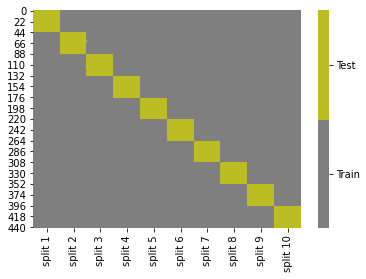

In [35]:
cmap = sns.color_palette("tab10",10)
g = sns.heatmap(kf_tt_df.replace({'Test':1,'Train':0}),cmap=cmap[7:9],cbar_kws={'ticks':[.25,.75]},linewidths=0,
    linecolor='gray')
colorbar = g.collections[0].colorbar
colorbar.set_ticklabels(['Train','Test'])

Note that unlike [`test_train_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) this does not always randomize and shuffle the data before splitting.

 If we apply those `lambda` functions along `axis=0`, we can see the size of each test set

In [36]:
kf_tt_df.apply(count_test,axis = 0)

split 1     45
split 2     45
split 3     44
split 4     44
split 5     44
split 6     44
split 7     44
split 8     44
split 9     44
split 10    44
dtype: int64

and training set:

In [37]:
kf_tt_df.apply(count_train,axis = 0)

split 1     397
split 2     397
split 3     398
split 4     398
split 5     398
split 6     398
split 7     398
split 8     398
split 9     398
split 10    398
dtype: int64

We can verify that these splits are the same size as what `test_train_split` does using the right settings.  10-fold splits the data into 10 parts and tests on 1, so that makes a test size of 1/10=.1, so we can use the `train_test_split` and check the length.

```
X_train2,X_test2, y_train2,y_test2 = train_test_split(diabetes_X, diabetes_y ,
                                                  test_size=.1,random_state=0)

[len(split) for split in [X_train2,X_test2,]]
```

Under the hood `train_test_split` uses `ShuffleSplit`
We can do a similar experiment as above to see what `ShuffleSplit` does.

In [38]:
skf = ShuffleSplit(10)
N_samples = len(diabetes_y)
ss_tt_df = pd.DataFrame(index=list(range(N_samples)))
i = 1
for train_idx, test_idx in skf.split(diabetes_X, diabetes_y):
    ss_tt_df['split ' + str(i)] = ['unused']*N_samples
    ss_tt_df['split ' + str(i)][train_idx] = 'Train'
    ss_tt_df['split ' + str(i)][test_idx] = 'Test'
    i +=1

ss_tt_df

,split 1,split 2,split 3,split 4,split 5,split 6,split 7,split 8,split 9,split 10
0,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
1,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
2,Train,Train,Train,Train,Train,Train,Train,Train,Test,Train
3,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
4,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
...,...,...,...,...,...,...,...,...,...,...
437,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
438,Test,Test,Train,Train,Train,Train,Train,Train,Train,Train
439,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
440,Train,Train,Train,Train,Train,Train,Train,Train,Test,Test


And plot

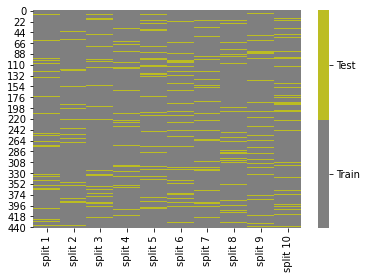

In [39]:
cmap = sns.color_palette("tab10",10)
g = sns.heatmap(ss_tt_df.replace({'Test':1,'Train':0}),cmap=cmap[7:9],cbar_kws={'ticks':[.25,.75]},linewidths=0,
    linecolor='gray')
colorbar = g.collections[0].colorbar
colorbar.set_ticklabels(['Train','Test'])

Now, we see the samples in each training set (gray along the columns) are a random subset of all of all of the samples.

And check the usage of each sample

In [40]:
sum(ss_tt_df.apply(count_test,axis = 1) ==1)

163

and exactly 9 training sets

In [41]:
sum(ss_tt_df.apply(count_test,axis = 1) ==9)

0

And the size of the splits

In [42]:
ss_tt_df.apply(count_test,axis = 0)

split 1     45
split 2     45
split 3     45
split 4     45
split 5     45
split 6     45
split 7     45
split 8     45
split 9     45
split 10    45
dtype: int64

and training set:

In [43]:
ss_tt_df.apply(count_train,axis = 0)

split 1     397
split 2     397
split 3     397
split 4     397
split 5     397
split 6     397
split 7     397
split 8     397
split 9     397
split 10    397
dtype: int64

Again the same sizes